# Exploratory visualizations

In [1]:
set.seed(1)

# Clean data summary file
s.clean <- read.table("../data/raw/Data_Batch1.txt", skip = 13, sep = ",")
names(s.clean) <- c("ID", "TESS_magnitude", "Cadence", "duration",
                    "latitude", "longitude", "Teff", "Teff_error",
                    "logg", "logg_error", "Type")

# Noisy data summary file
s.noisy <- read.table("../data/raw/Data_Batch1_noisy.txt", skip = 13, sep = ",")
names(s.noisy) <- c("ID", "TESS_magnitude", "Cadence", "duration",
                    "latitude", "longitude", "Teff", "Teff_error",
                    "logg", "logg_error", "Type")

# We need the ID to identify the individual files
s.clean$ID <- as.integer(substring(text = s.clean$ID, first = 5))
s.noisy$ID <- as.integer(substring(text = s.noisy$ID, first = 5))
s.clean$filename <- file.path("..", "data", "raw", paste("Star", s.clean$ID, ".clean", sep = ""))
s.noisy$filename <- file.path("..", "data", "raw", paste("Star", s.noisy$ID, ".noisy_shuf", sep = ""))
head(s.clean)

ID,TESS_magnitude,Cadence,duration,latitude,longitude,Teff,Teff_error,logg,logg_error,Type,filename
1,16.8,1800,27.38,9.84,108.10,4354,300,-999.00,-999.00,Trans/Eclipse,../data/raw/Star1.clean
2,6.0,1800,82.17,65.38,108.08,8000,200,-999.00,-999.00,Trans/Eclipse,../data/raw/Star2.clean
3,15.5,1800,27.37,49.41,246.24,2754,250,-999.00,-999.00,LPV;MIRA,../data/raw/Star3.clean
4,13.8,120,27.40,42.44,226.11,16160,130,3.91,0.16,SPB,../data/raw/Star4.clean
5,14.6,20,27.40,52.68,180.44,8000,200,-999.00,-999.00,Trans/Eclipse,../data/raw/Star5.clean
6,10.3,1800,54.79,40.29,283.81,2780,250,-999.00,-999.00,LPV;MIRA,../data/raw/Star6.clean


A couple of random examples

In [2]:
s.clean_sample <- s.clean[sample(1:dim(s.clean)[1], 12),]
s.noisy_sample <- s.noisy[sample(1:dim(s.clean)[1], 12),]

## Clean simulations

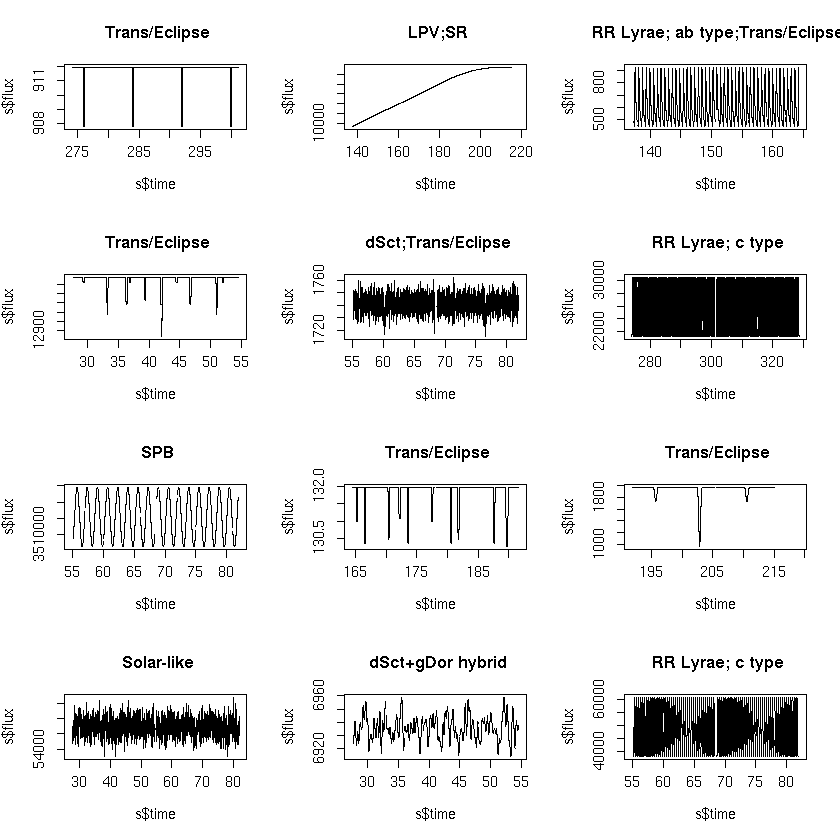

In [3]:
par(mfrow = c(4,3))
for(i in 1:12) {
    s <- read.table(s.clean_sample$filename[i], na.strings = "nan")
    names(s) <- c("time", "flux", "error")
    plot(s$time, s$flux, type = "l", main = s.clean_sample$Type[i])
}

## Noisy simulations

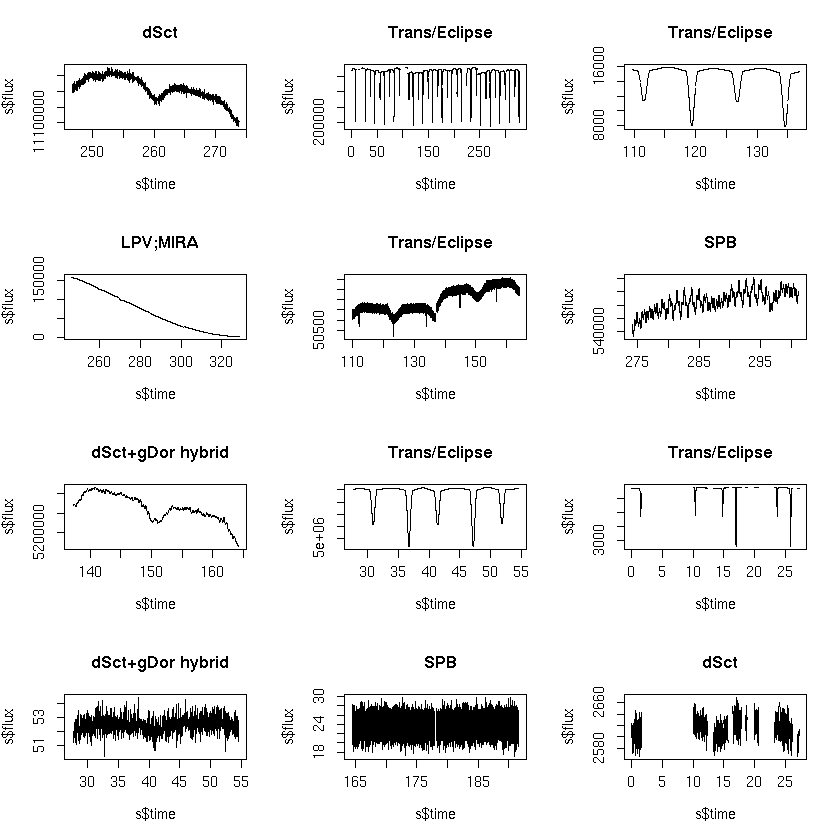

In [4]:
par(mfrow = c(4,3))
for(i in 1:12) {
    s <- read.table(s.noisy_sample$filename[i], na.strings = "nan")
    names(s) <- c("time", "flux", "error")
    plot(s$time, s$flux, type = "l", main = s.noisy_sample$Type[i])
}

# Significant peaks in a LSP?

Can we easily find peaks in the Lomb-Scargle periodogram?

In [5]:
require(lomb)
require(wmtsa)

Loading required package: lomb
Loading required package: wmtsa


## Clean simulations

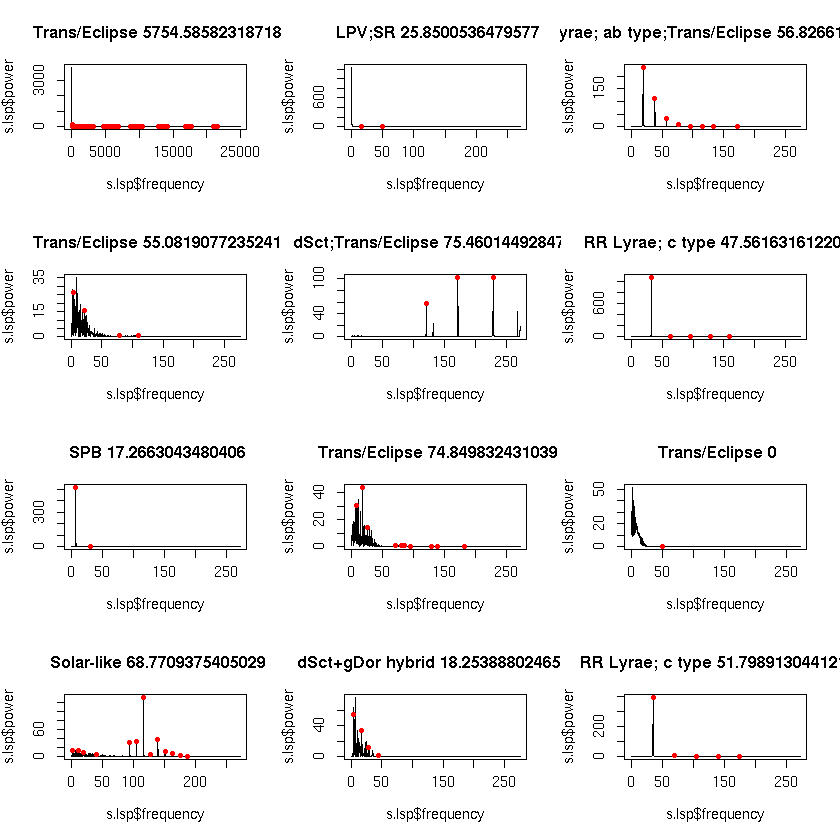

In [6]:
par(mfrow = c(4,3))
for(i in 1:12) {
    s <- read.table(s.clean_sample$filename[i], na.strings = "nan")
    names(s) <- c("time", "flux", "error")
    s.lsp <- lsp(x = s$flux, times = s$time, plot = FALSE)
    s.lsp$scanned <- s.lsp$scanned * 10^6 / 86400
    s.lsp <- data.frame(frequency = s.lsp$scanned, power = s.lsp$power)
    
    s.SS <- splus2R::signalSeries(data = s.lsp$power, positions. = s.lsp$frequency)
    s.CWT <- wavCWT(x = s.SS)
    s.CWTTree <- wavCWTTree(s.CWT)
    s.peaks <- wavCWTPeaks(s.CWTTree, snr.min = 3, length.min = 7)
    plot(s.lsp$frequency, s.lsp$power, type = "l", 
         main = paste(s.clean_sample$Type[i], mad(x = s.peaks$x)))
    points(s.peaks$x, s.peaks$y, pch = 20, col = "red")
}

## Noisy simulations

In [7]:
par(mfrow = c(4,3))
for(i in 1:12) {
    s <- read.table(s.noisy_sample$filename[i], na.strings = "nan")
    names(s) <- c("time", "flux", "error")
    s.lsp <- lsp(x = s$flux, times = s$time, plot = FALSE)
    s.lsp$scanned <- s.lsp$scanned * 10^6 / 86400
    s.lsp <- data.frame(frequency = s.lsp$scanned, power = s.lsp$power)
    
    s.SS <- splus2R::signalSeries(data = s.lsp$power, positions. = s.lsp$frequency)
    s.CWT <- wavCWT(x = s.SS)
    s.CWTTree <- wavCWTTree(s.CWT)
    s.peaks <- wavCWTPeaks(s.CWTTree, snr.min = 3, length.min = 7)
    plot(s.lsp$frequency, s.lsp$power, type = "l", 
         main = paste(s.noisy_sample$Type[i], mad(x = s.peaks$x)))
    points(s.peaks$x, s.peaks$y, pch = 20, col = "red")
}

ERROR: Error in `row.names<-.data.frame`(`*tmp*`, value = as.character(seq(nrow(peaks)))): invalid 'row.names' length


mmmh.... something fishy here...